# 당뇨병 데이터셋으로 다중회귀
0) 어떤 feature가 당뇨병과 가장 연관이 깊은지
1) test_size = 0.1
2) LinearRegression vs DecisionTreeRegressor
3) 모델 성능 MSE

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

In [23]:
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [36]:
df.corr() # 상관행렬

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


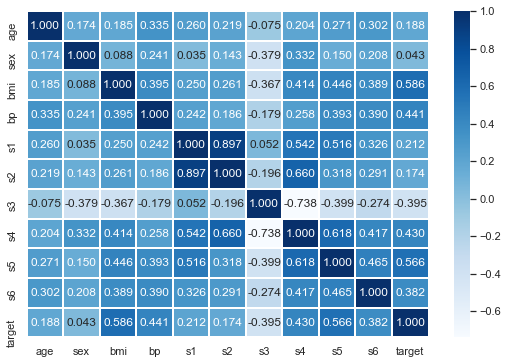

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc = {'figure.figsize':(9,6)})
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', fmt=".3f", linewidths=1)
plt.show()

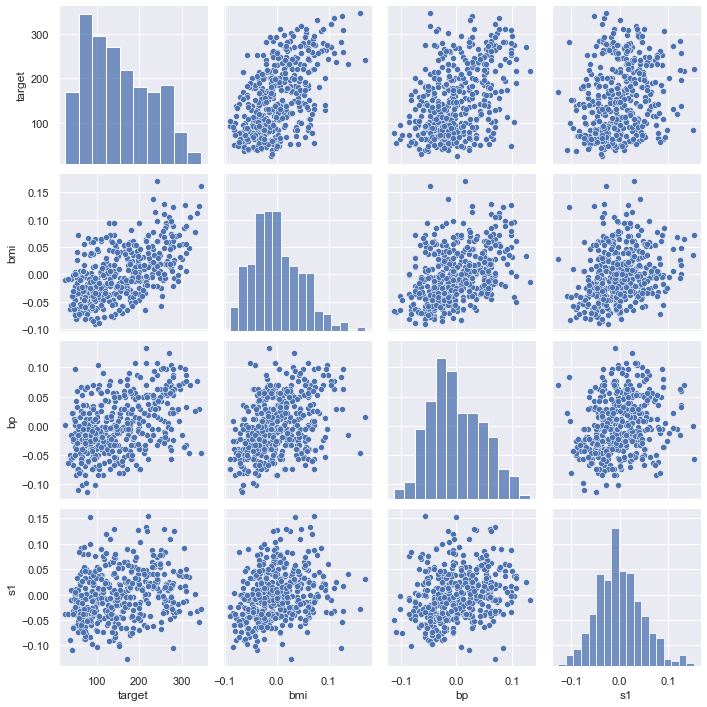

In [49]:
sns.pairplot(df[["target", "bmi", "bp", "s1"]])
plt.show()

In [51]:
for feature in diabetes.feature_names:
    print(feature)
    a = df[feature].values
    b = df.index.values
    print(f'공분산(Covariance):{np.cov(a,b)[0,1]}')

age
"공분산(Covariance):",0.5704362110640172
sex
"공분산(Covariance):",0.18167332264159142
bmi
"공분산(Covariance):",0.35611668566700566
bp
"공분산(Covariance):",0.37419814701835147
s1
"공분산(Covariance):",0.5879062793928899
s2
"공분산(Covariance):",0.5265795535065279
s3
"공분산(Covariance):",-0.31260319084940874
s4
"공분산(Covariance):",0.596171914914845
s5
"공분산(Covariance):",0.5252421571660828
s6
"공분산(Covariance):",0.5611991317639823


In [26]:
# 데이터세트분리
from sklearn.model_selection import train_test_split
X = df.iloc[:,:-1]
y = df.iloc[:,-1:]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

- LinearRegression

In [30]:
# 모델 생성, fit
from sklearn.linear_model import LinearRegression
lr_LR = LinearRegression()
lr_LR.fit(X,y)

LinearRegression()

In [31]:
lr_LR.coef_, lr_LR.intercept_

(array([619.22282068]), 152.13348416289614)

In [32]:
y = diabetes.target
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr_LR = LinearRegression()
    lr_LR.fit(X, y)
    r2 = lr_LR.score(X, y)
    print(f'{feature}:\t{r2:.4f}')

age:	0.0353
sex:	0.0019
bmi:	0.3439
bp:	0.1949
s1:	0.0450
s2:	0.0303
s3:	0.1559
s4:	0.1853
s5:	0.3202
s6:	0.1463


- DecisionTreeRegressor

In [33]:
from sklearn.tree import DecisionTreeRegressor
lr_DTR = DecisionTreeRegressor()
lr_DTR.fit(X,y)

DecisionTreeRegressor()

In [35]:
y = diabetes.target
for feature in diabetes.feature_names:
    X = df[feature].values.reshape(-1,1)
    lr_DTR = DecisionTreeRegressor()
    lr_DTR.fit(X, y)
    r2 = lr_LR.score(X, y)
    print(f'{feature}:\t{r2:.4f}')

age:	-0.0026
sex:	-0.1134
bmi:	0.3023
bp:	0.1914
s1:	0.0159
s2:	-0.0131
s3:	-0.4483
s4:	0.1830
s5:	0.2866
s6:	0.1463
